![Big Data Bosphorus](img/big_data.jpg)

## Machine Learning Basics
### Classification

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  

In [25]:
def plot_data1(data, labels):
    plt.figure(figsize=(15, 4))
    ax1 = plt.subplot(1,2,1)
    positives = data[labels == 1, :]
    negatives = data[labels == 0, :]
    ax1.scatter(positives[:, 0], positives[:, 1], 
                       color='red', marker='+', s=200)
    ax1.scatter(negatives[:, 0], negatives[:, 1], 
                       color='blue', marker='_', s=200)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_title('linearly seperable data')
    
    w1,w2,w0 = [-1.29382908, 1.5541364, 0.03008782]

    ax2 = plt.subplot(1,2,2)
    ax2.scatter(positives[:, 0], positives[:, 1], 
                       color='red', marker='+', s=200)
    ax2.scatter(negatives[:, 0], negatives[:, 1], 
                       color='blue', marker='_', s=200)
    X = np.linspace(0, 1, 100)
    line = Line2D(X, (-w0-w1*X)/w2, linewidth=1, linestyle='--', color='k')
    ax2.add_line(line)
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('decision boundary')
    plt.tight_layout()
    plt.show()

In [31]:
def plot_data2(data, labels):
    positives = data[labels == 1, :]
    negatives = data[labels == 0, :]
    plt.scatter(positives[:, 0], positives[:, 1], 
                       color='red', marker='+', s=200)
    plt.scatter(negatives[:, 0], negatives[:, 1], 
                       color='blue', marker='_', s=200)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('non-linearly seperable data')
    plt.show()

In [33]:
positives = np.array([[0.4, 0.4], [0, 0.6], [0.2, 0.6], [0.1, 0.3]])
negatives = np.array([[0.2, 0], [0.6, 0.4], [0.5, 0.2]])
data = np.concatenate([positives, negatives])
labels = np.array([1, 1, 1, 1, 0, 0, 0])

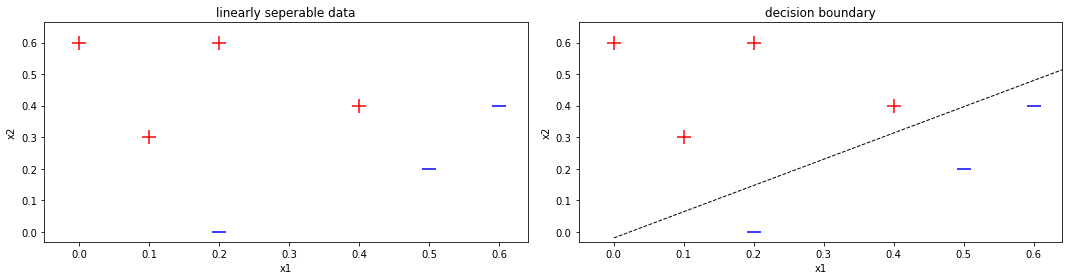

In [34]:
plot_data1(data, labels)

#### How to classify (put a decision boundary) linearly seperable data?

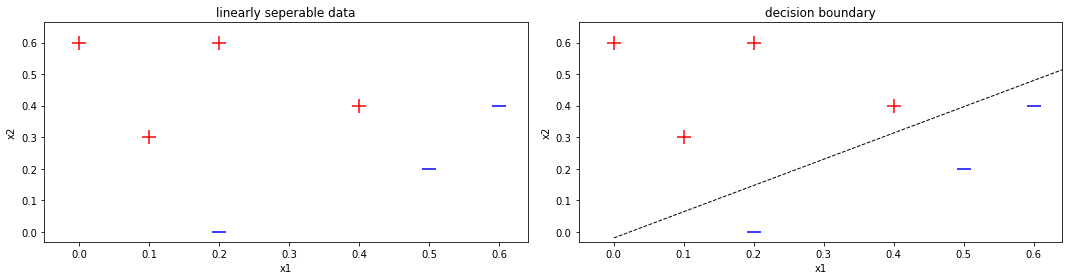

In [35]:
plot_data1(data, labels)

Natural Attempt to find a decision boundary: <br /> <br />
$f_w(x) = w_1x1 + w_2x2 + w_0 = W^TX$ <br /> <br />
$W^TX = 0$ is a line called decision boundary <br /> <br />
$y = 1$ if $W^TX > 0$ <br />
$y = 0$ if $W^TX < 0$ 

#### How to find proper weights that seperates the data well?

* We need a loss function that tells how bad we are at classification.
* Our purpose is to find the best weights that minimizes the loss.

Example Loss Function:

Find $W$ that minimizes $\hat{L}(f_w)=\dfrac{1}{n}\sum_{i=1}^{n} (\hat{y_i}-y_i)^2$ where $\hat{y_i}$ is prediction value, $y_i$ is the actual value.

#### We want our prediction to be either 0 or 1, but $W^TX$ can take any value

### Sigmoid Function: <br />
$\sigma{(z)} = \dfrac{1}{1+exp(-z)}$

In [8]:
def plotsigmoid():
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    x=np.linspace(-5,5,100)
    plt.plot(x,sigmoid(x),'b')
    plt.plot(x,sigmoid(np.array([0]*len(x))), 'k--')
    plt.xticks([-5,0,5])
    plt.yticks([0, 0.5, 1])
    plt.xlim([-5,5])
    plt.ylim([0,1])
    plt.grid()
    plt.title('Sigmoid Function')

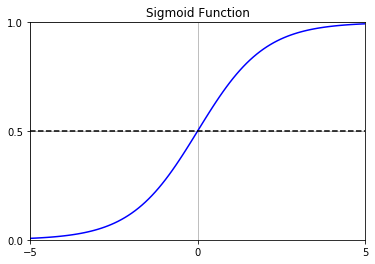

In [124]:
plotsigmoid()

Find $w$ that minimizes $\hat{L}(f_w)=\dfrac{1}{n}\sum_{i=1}^{n} (\sigma(w^Tx_i)-y_i)^2$

#### How to update weights to decrease our cost function?

#### Gradient Descent
Minimize loss $\hat{L}(W)$, where the hypothesis is parametrized by $W$ <br />

* Initialize $W_0$
* $W_{t+1} = W_t - \eta_t\nabla\hat{L}(W_t)$

#### Different Gradient Descent Implementations

![](img/opt1.gif)

#### How can we implement this without taking the all ugly derivations?

* Keras: The Python Deep Learning library
* Works on top of Tensorflow
* Does all the ugly work for us :)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

batch_size = 1
np_epoch = 100

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(data, labels, batch_size, np_epoch)

Epoch 1/100
7/7 [==============================] - 0s - loss: 0.1776 - acc: 1.0000     
Epoch 2/100
7/7 [==============================] - 0s - loss: 0.1773 - acc: 1.0000     
Epoch 3/100
7/7 [==============================] - 0s - loss: 0.1772 - acc: 1.0000     
Epoch 4/100
7/7 [==============================] - 0s - loss: 0.1771 - acc: 1.0000     
Epoch 5/100
7/7 [==============================] - 0s - loss: 0.1770 - acc: 1.0000     
Epoch 6/100
7/7 [==============================] - 0s - loss: 0.1769 - acc: 1.0000     
Epoch 7/100
7/7 [==============================] - 0s - loss: 0.1767 - acc: 1.0000     
Epoch 8/100
7/7 [==============================] - 0s - loss: 0.1767 - acc: 1.0000     
Epoch 9/100
7/7 [==============================] - 0s - loss: 0.1765 - acc: 1.0000     
Epoch 10/100
7/7 [==============================] - 0s - loss: 0.1764 - acc: 1.0000     
Epoch 11/100
7/7 [==============================] - 0s - loss: 0.1763 - acc: 1.0000     
Epoch 12/100
7/7 [============

In [4]:
def drawlogisticplots():
    plt.figure(figsize=(15, 4)) 
    ax1 = plt.subplot(1,3,1)
    ax1.plot(history.history['loss'])
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax2 = plt.subplot(1,3,2)
    ax2.plot(history.history['acc'])
    ax2.set_title('model accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax3 = plt.subplot(1,3,3)
    ax3.scatter(positives[:, 0], positives[:, 1], 
                           color='red', marker='+', s=200)
    ax3.scatter(negatives[:, 0], negatives[:, 1], 
                           color='blue', marker='_', s=200)
    (w1,w2),w0 = model.get_weights()
    X = np.linspace(0, 1, 100)
    line = Line2D(X, (-w0-w1*X)/w2, linewidth=1, linestyle='--', color='k')
    ax3.add_line(line)
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_title('decision boundary')
    plt.tight_layout()
    plt.show()

#### What Keras provides us as history?

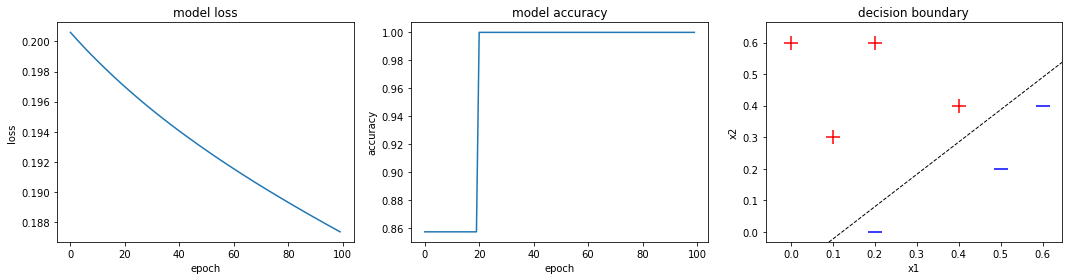

In [7]:
drawlogisticplots()

#### What if our problem is not linearly seperable?

##### XOR Problem

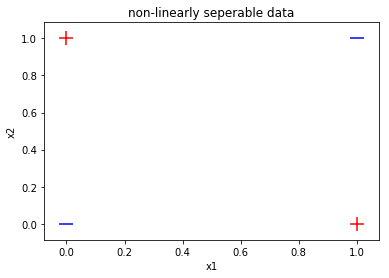

In [38]:
positives = np.array([[1, 0], [0, 1]])
negatives = np.array([[0, 0], [1, 1]])

data = np.concatenate([positives, negatives])
labels = np.array([1, 1, 0, 0])
plot_data2(data, labels)

##### We need a classifier for non-linearly seperable data.

## Neural Networks

![One Hidden Layer Neural Network](img/neural_net.jpeg)

![One Hidden Layer Neural Network](img/neural_net.jpeg)

#####  Weights and input values are multiplied again 
$h(x)=W_1^Tx$ <br />
$g(h)=W_2^Th$ <br />
$f(x)=g(h(x))$

##### We need non-linear activation functions such as sigmoid, tanh and ReLu

### Nonlinear Activation Functions

#### Sigmoid Function
$\sigma{(z)} = \dfrac{1}{1+e^{-z}}$

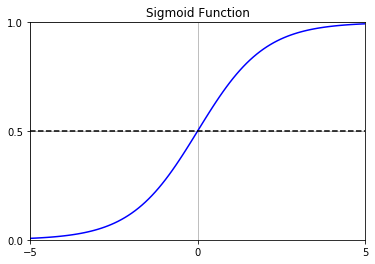

In [9]:
plotsigmoid()

#### Tanh
$tanh(z) = \dfrac{e^z-e^{-z}}{e^z+e^{-z}}$

In [10]:
def plottanh():
    tanh = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    x=np.linspace(-5,5,100)
    plt.plot(x,tanh(x),'b')
    plt.plot(x,tanh(np.array([0]*len(x))), 'k--')
    plt.xticks([-5,0,5])
    plt.yticks([-1, -0.5, 0, 0.5, 1])
    plt.xlim([-5,5])
    plt.ylim([-1,1])
    plt.grid()
    plt.title('Tanh Function')

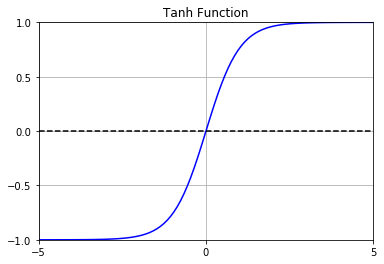

In [11]:
plottanh()

#### ReLu (Rectified Linear Unit)
$relu(z) = max(0, z)$

In [12]:
def plotrelu():
    relu = lambda x: np.maximum(0, x)
    x=np.linspace(-5,5,100)
    plt.plot(x,relu(x),'b')
    plt.xticks([-5,0,1, 2, 3, 4, 5])
    plt.yticks([0, 1, 2, 3, 4, 5])
    plt.xlim([-5,5])
    plt.ylim([0,5])
    plt.grid()
    plt.title('ReLu Function')

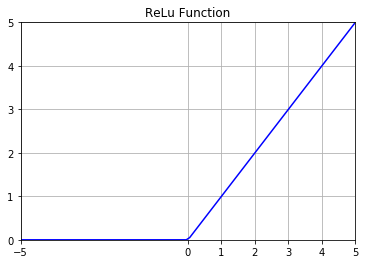

In [13]:
plotrelu()

* Neural network learns by minimizing the cost function $\hat{L}(f_w)=\dfrac{1}{n}\sum_{i=1}^{n} (\hat{y_i}-y_i)^2$

#### How weights are updated for neural networks?

##### Backpropagation

* Repeated application of chain rule for partial derivatives. Finds the gradient of the loss $\hat{L}$ w.r.t. all parameters of neural network. 
* Thanks to Keras we don't need to take derivatives again :)

### Solving XOR problem with multi layer neural network

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

batch_size = 1
np_epoch = 200

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(data, labels, batch_size, np_epoch)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.2440 - acc: 0.7500     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.2427 - acc: 0.7500     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.2424 - acc: 0.7500     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.2418 - acc: 0.7500     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.2410 - acc: 0.7500     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.2404 - acc: 0.7500         
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.2396 - acc: 0.7500     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.2392 - acc: 0.7500         
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.2386 - acc: 0.7500         
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.2379 - acc: 0.7500     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.2374 - acc: 0.7500     
Epoch 12/200
4/4 [

4/4 [==============================] - 0s - loss: 0.1972 - acc: 1.0000     
Epoch 92/200
4/4 [==============================] - 0s - loss: 0.1968 - acc: 1.0000     
Epoch 93/200
4/4 [==============================] - 0s - loss: 0.1962 - acc: 1.0000     
Epoch 94/200
4/4 [==============================] - 0s - loss: 0.1959 - acc: 1.0000     
Epoch 95/200
4/4 [==============================] - 0s - loss: 0.1953 - acc: 1.0000     
Epoch 96/200
4/4 [==============================] - 0s - loss: 0.1949 - acc: 1.0000     
Epoch 97/200
4/4 [==============================] - 0s - loss: 0.1944 - acc: 1.0000     
Epoch 98/200
4/4 [==============================] - 0s - loss: 0.1940 - acc: 1.0000     
Epoch 99/200
4/4 [==============================] - 0s - loss: 0.1936 - acc: 1.0000     
Epoch 100/200
4/4 [==============================] - 0s - loss: 0.1933 - acc: 1.0000     
Epoch 101/200
4/4 [==============================] - 0s - loss: 0.1930 - acc: 1.0000     
Epoch 102/200
4/4 [=============

4/4 [==============================] - 0s - loss: 0.1586 - acc: 1.0000     
Epoch 181/200
4/4 [==============================] - 0s - loss: 0.1580 - acc: 1.0000     
Epoch 182/200
4/4 [==============================] - 0s - loss: 0.1577 - acc: 1.0000     
Epoch 183/200
4/4 [==============================] - 0s - loss: 0.1573 - acc: 1.0000     
Epoch 184/200
4/4 [==============================] - 0s - loss: 0.1569 - acc: 1.0000     
Epoch 185/200
4/4 [==============================] - 0s - loss: 0.1564 - acc: 1.0000     
Epoch 186/200
4/4 [==============================] - 0s - loss: 0.1559 - acc: 1.0000     
Epoch 187/200
4/4 [==============================] - 0s - loss: 0.1555 - acc: 1.0000     
Epoch 188/200
4/4 [==============================] - 0s - loss: 0.1551 - acc: 1.0000     
Epoch 189/200
4/4 [==============================] - 0s - loss: 0.1548 - acc: 1.0000     
Epoch 190/200
4/4 [==============================] - 0s - loss: 0.1542 - acc: 1.0000     
Epoch 191/200
4/4 [=====

In [40]:
def plotxor():
    plt.figure(figsize=(15, 4)) 
    ax1 = plt.subplot(1,3,1)
    ax1.plot(history.history['loss'])
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax2 = plt.subplot(1,3,2)
    ax2.plot(history.history['acc'])
    ax2.set_title('model accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax3 = plt.subplot(1,3,3)
    ax3.scatter(positives[:, 0], positives[:, 1], 
                           color='red', marker='+', s=200)
    ax3.scatter(negatives[:, 0], negatives[:, 1], 
                           color='blue', marker='_', s=200)
    x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    x2_min, x2_max = data[:, 1].min() -1 , data[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                         np.arange(x2_min, x2_max, 0.02))
    Z = np.array(model.predict_classes(np.c_[xx1.ravel(), xx2.ravel()]))
    Z = Z.reshape(xx1.shape)
    #ax3.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.1)
    ax3.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_title('decision boundary')
    plt.tight_layout()
    plt.show()

#### Plotting the Keras history 

21696/22500 [===========================>..] - ETA: 0s

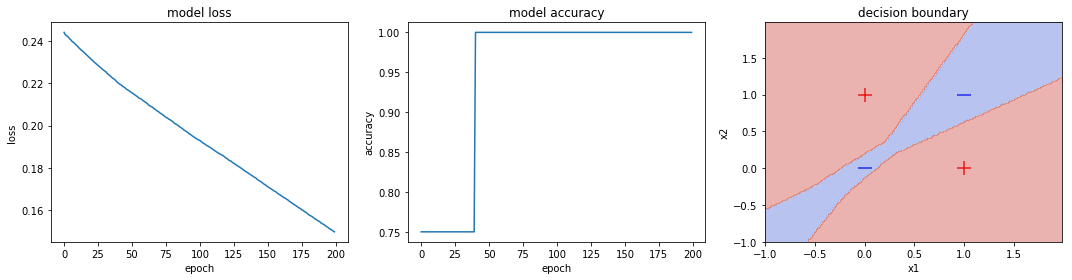

In [41]:
plotxor()

#### What if the problem is too difficult to solve?

##### Deep Neural Networks

* A deep network can represent very complex functions
* It needs large labeled dataset
* CPUs are too slow GPUs are usually needed
* Regularization is necessary to prevent overfitting
* Domain specific arhitectures are needed such as Convolution Neural Net, Recurrent Neural net and so on

#### Example Architecture Convolutional Neural Net

* Mostly used in image classfications
* Instead of fully connected layers it uses convolution filters
* Benefits mostly from Large Scale Visual Recognition Challenge dataset ImageNet

Convolution Layer            |  Pooling Layer
:-------------------------:|:-------------------------:
![](img/conv.gif)  |  ![](img/pool.gif)

#### What if we don't have enough computing resources? Should we give up Deep Learning?

##### Transfer Learning on Convolutional Neural Network

* We use pretrained models (weights are already updated) to perform classfication.
* If the dataset which is trained on the model, different than our dataset, we can still benefit the weights.

In [26]:
from scripts.data_utils import load_CIFAR10

In [27]:
X_train, y_train, X_test, y_test, label_names = load_CIFAR10(train_percent=0.02, test_percent=0.02)

print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Label names :', ','.join(label_names))

Training data shape:  (1000, 32, 32, 3)
Training labels shape:  (1000,)
Test data shape:  (200, 32, 32, 3)
Test labels shape:  (200,)
Label names : airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck


In [28]:
def plotcifar10():
    plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

    num_classes = len(label_names)
    samples_per_class = 10
    for y, cls in enumerate(label_names):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

##### Image classfication on CIFAR-10 dataset using transfer learning

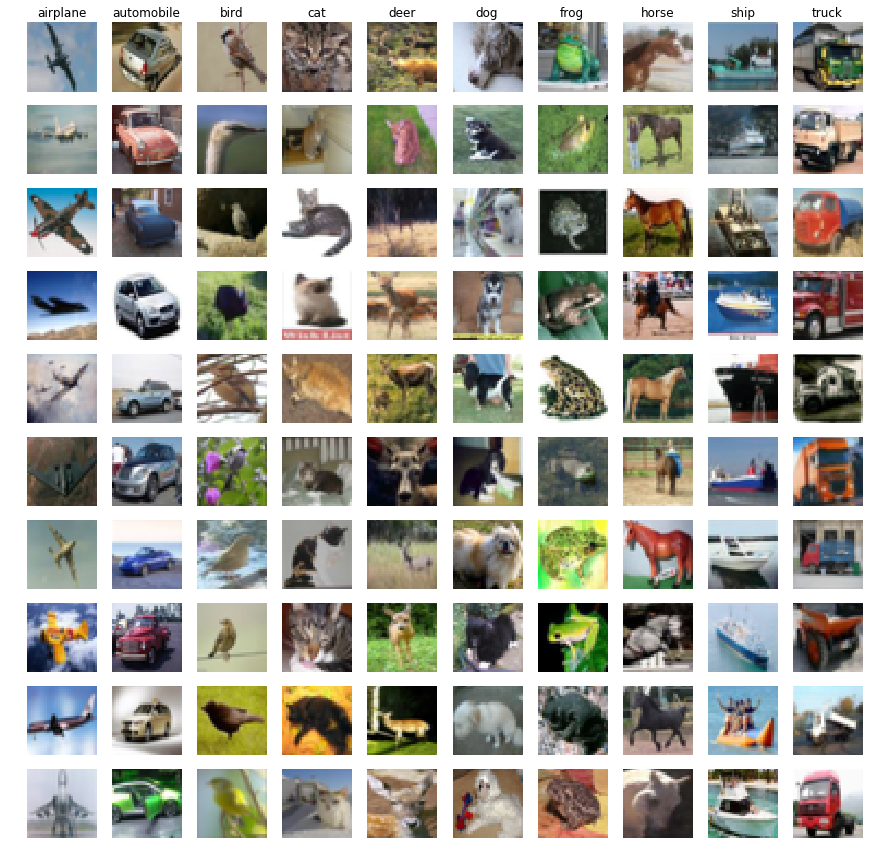

In [29]:
plotcifar10()

In [87]:
from tqdm import tqdm

##### We will use a pretrained model from Keras to extract features

In [83]:
from keras.applications import resnet50
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array
model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [88]:
def extract_features(images, model, preprocessing_function, hw_tuple=(224,224)):
    features = []
    for image in tqdm(images):
        img = array_to_img(image)
        img = img.resize(hw_tuple)
        m = img_to_array(img)
        t = np.expand_dims(m, axis=0)
        x = preprocessing_function(t)
        p = model.predict(x)
        features.extend(p)
    return features

In [93]:
# train features
bottleneck_features_train = extract_features(X_train, model, resnet50.preprocess_input)


100%|██████████| 1000/1000 [10:32<00:00,  1.61it/s]


In [101]:
bottleneck_features_train = np.array(bottleneck_features_train)
np.save('datasets/resnet50_train.features.npy', bottleneck_features_train)

In [30]:
bottleneck_features_train = np.load('datasets/resnet50_train.features.npy')
bottleneck_features_test = np.load('datasets/resnet50_test.features.npy')

In [95]:
# test features
bottleneck_features_test = extract_features(X_test, model, resnet50.preprocess_input)

100%|██████████| 200/200 [02:07<00:00,  1.62it/s]


In [102]:
bottleneck_features_test = np.array(bottleneck_features_test)
np.save('datasets/resnet50_test.features.npy', bottleneck_features_test)

#### Small Fully Connected Network for Classification using bottlenect features

In [31]:
from keras.layers import Flatten, Dropout

model = Sequential()
model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(bottleneck_features_train, y_train, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s - loss: 0.2885 - acc: 0.9100 - val_loss: 0.8820 - val_acc: 0.7100
Epoch 2/10
800/800 [==============================] - 0s - loss: 0.2772 - acc: 0.9150 - val_loss: 0.8996 - val_acc: 0.7200
Epoch 3/10
800/800 [==============================] - 0s - loss: 0.2628 - acc: 0.9200 - val_loss: 0.9149 - val_acc: 0.7300
Epoch 4/10
800/800 [==============================] - 0s - loss: 0.2102 - acc: 0.9325 - val_loss: 0.8875 - val_acc: 0.7200
Epoch 5/10
800/800 [==============================] - 0s - loss: 0.1767 - acc: 0.9525 - val_loss: 0.9136 - val_acc: 0.7150
Epoch 6/10
800/800 [==============================] - 0s - loss: 0.1758 - acc: 0.9550 - val_loss: 0.8906 - val_acc: 0.7300
Epoch 7/10
800/800 [==============================] - 0s - loss: 0.1613 - acc: 0.9500 - val_loss: 0.9481 - val_acc: 0.7400
Epoch 8/10
800/800 [==============================] - ETA: 0s - loss: 0.1533 - acc: 0.955 - 0

In [35]:
def plotsmallnetwork():
    plt.figure(figsize=(15, 4)) 
    ax1 = plt.subplot(1,2,1)
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_title('model accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2 = plt.subplot(1,2,2)
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')

    plt.tight_layout()
    plt.show()

##### Plotting the Keras history for the classification

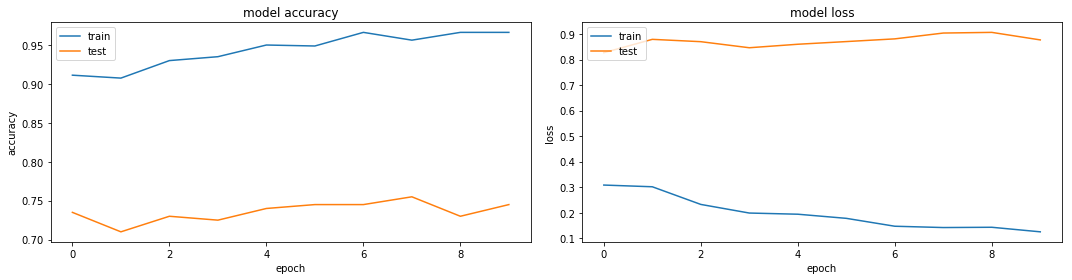

In [112]:
plotsmallnetwork()

In [115]:
y_pred = model.predict_classes(bottleneck_features_test)

 32/200 [===>..........................] - ETA: 0s

##### How good our new model is with the test data?

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print ("Accuracy Score: ", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred, target_names=label_names))

Accuracy Score:  0.7
             precision    recall  f1-score   support

   airplane       0.60      0.60      0.60        20
 automobile       0.72      0.93      0.81        14
       bird       0.62      0.48      0.54        21
        cat       0.71      0.79      0.75        19
       deer       0.46      0.40      0.43        15
        dog       0.58      0.61      0.59        18
       frog       0.77      0.77      0.77        26
      horse       0.62      0.72      0.67        18
       ship       0.92      0.79      0.85        28
      truck       0.82      0.86      0.84        21

avg / total       0.70      0.70      0.70       200



#### Thanks...